<a href="https://colab.research.google.com/github/Dibyas83/ML/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
df = pd.read_csv('mymoviedb.csv',lineterminator= '\n')

'\n' is put at end  to mark as end and start as a new line below it

In [133]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [135]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [136]:
df.duplicated().sum()

np.int64(0)

In [137]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Preprocessing - change data type of release-date to datetime and extract only year value.
remove not req cols,outliers,white spaces between data
vote avg be better categorized


In [138]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [139]:
print(df['Release_Date'].dtypes)

datetime64[ns]


In [140]:
df['Release_Date'] = df['Release_Date'].dt.year

In [141]:
df['Release_Date'].dtypes

dtype('int32')

dropping columns

In [142]:
cols = ['Overview',	'Original_Language'	,	'Poster_Url']

In [143]:
df.drop(cols, axis=1, inplace=True)

In [144]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

labeling by creating a new col,using a user defined function.labels created on basis of edges outlined and labels given

In [145]:
def categorize_col(df,col_name, labels):
  edges = [df[col_name].describe()['min'],
           df[col_name].describe()['25%'],
           df[col_name].describe()['50%'],
           df[col_name].describe()['75%'],
           df[col_name].describe()['max']]

  df[col_name] = pd.cut(df[col_name], edges, labels = labels, duplicates = 'drop')
  return df

In [146]:
labels = ['low', 'medium', 'high', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()


['popular', 'medium', 'high', 'low', NaN]
Categories (4, object): ['low' < 'medium' < 'high' < 'popular']

In [147]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,medium,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,high,"Action, Adventure, Thriller, War"


In [148]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
low,2467
popular,2450
high,2412
medium,2398


In [149]:
df.dropna(inplace=True)
df.isna().sum()


,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


we would split genres into a list and thn explode our dataframr to have only one genre per row for each movie

In [150]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [151]:
df['Genre']= df['Genre'].astype('category')

converting col into category using astype and category

In [152]:
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [153]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


no of unique data in each col

In [154]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


casting col into category

visualize

In [155]:
sns.set_style('whitegrid')


In [156]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


on y axis we want genre,data,kind(count) order by value counts and give it index

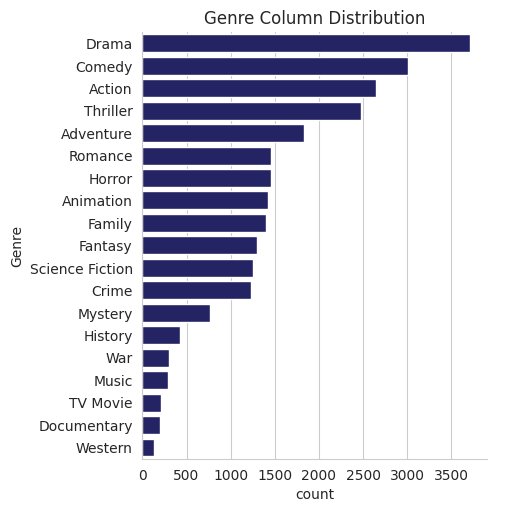

In [157]:
sns.catplot(y= 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color= 'midnightblue')

plt.title('Genre Column Distribution')
plt.show()

which has highest votes in vote avg col

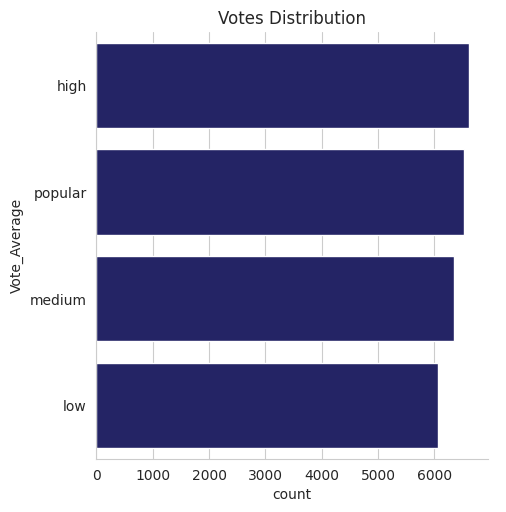

In [159]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color= 'midnightblue')

plt.title('Votes Distribution')
plt.show()

what is the genre of highest voted

In [160]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [161]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [162]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,high,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,high,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,high,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


In [163]:
df['Popularity'] == df['Popularity'].min()

,Popularity
0,False
1,False
2,False
3,False
4,False
...,...
25547,True
25548,True
25549,True
25550,True


year of most released movie

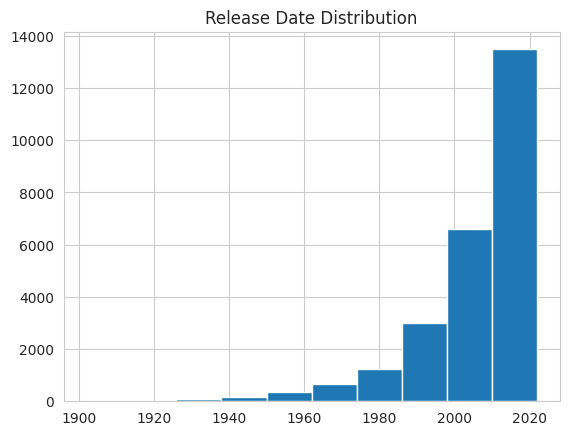

In [164]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()